<a href="https://colab.research.google.com/github/ysokr1001/python/blob/main/0526_%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1%2C_%EC%A3%BC%EC%8B%9D%EB%A7%88%EA%B0%90%EC%98%88%EC%B8%A1%2C_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#집값 예측 - 선형회귀 실행 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv", delim_whitespace=True, header=None)

dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1)) 

model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)

Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

Epoch 1/2000
24/24 [==============================] - 0s 6ms/step - loss: 10635.3115 - val_loss: 3653.8191

Epoch 00001: val_loss improved from inf to 3653.81909, saving model to ./model/01-3653.8191.hdf5
Epoch 2/2000
24/24 [==============================] - 0s 2ms/step - loss: 1417.0900 - val_loss: 684.9082

Epoch 00002: val_loss improved from 3653.81909 to 684.90820, saving model to ./model/02-684.9082.hdf5
Epoch 3/2000
24/24 [==============================] - 0s 2ms/step - loss: 582.2314 - val_loss: 561.9515

Epoch 00003: val_loss improved from 684.90820 to 561.95148, saving model to ./model/03-561.9515.hdf5
Epoch 4/2000
24/24 [==============================] - 0s 2ms/step - loss: 508.8246 - val_loss: 487.4759

Epoch 00004: val_loss improved from 561.95148 to 487.47589, saving model to ./model/04-487.4759.hdf5
Epoch 5/2000
24/24 [==============================] - 0s 3ms/step - loss: 428.7079 - val_loss: 400.7823

Epoch 00005: val_loss improved from 487.47589 to 400.78232, saving mod

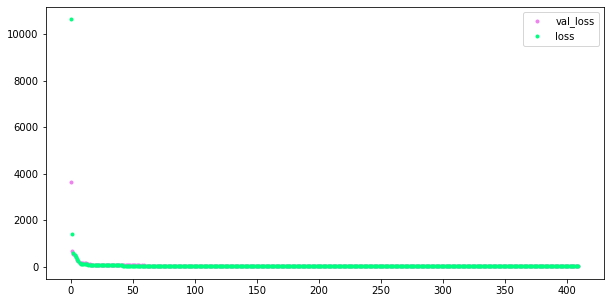

실제가격: 22.600, 예상가격: 24.781
실제가격: 50.000, 예상가격: 26.943
실제가격: 23.000, 예상가격: 22.736
실제가격: 8.300, 예상가격: 10.709
실제가격: 21.200, 예상가격: 18.845
실제가격: 19.900, 예상가격: 21.533
실제가격: 20.600, 예상가격: 23.070
실제가격: 18.700, 예상가격: 22.658
실제가격: 16.100, 예상가격: 17.157
실제가격: 18.600, 예상가격: 10.397


In [11]:
#집값 예측 - 집값 예측 자동 중단 및 Graph 적용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

seed= 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv", delim_whitespace=True, header=None)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1)) 

model.compile(loss = 'mean_squared_error', optimizer='adam')

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping_callback = EarlyStopping(monitor = "val_loss", patience=50)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, moniter='val_loss', verbose = 1, save_best_only=True)


history = model.fit(X_train, Y_train, validation_split=0.33, epochs=2000, batch_size=10, callbacks=[early_stopping_callback, checkpointer])

hist = pd.DataFrame(history.history)
print(hist.tail())


y_vloss = history.history['val_loss']
y_loss = history.history['loss']

import matplotlib.pyplot as plt
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10, 5))
plt.plot(x_len, y_vloss, "o", c='violet', markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c='springgreen', markersize=3, label='loss')
plt.legend()
plt.show()


Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

In [ ]:
#주식 마감 주가 예측

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import tensorflow as tf

path = "/content/drive/MyDrive/Colab Notebooks/"
data= pd.read_csv(path+"data-02-stock_daily.csv", header=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (30, 20))
ax1= fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(data['Open'])
ax1.plot(data['High'])
ax1.plot(data['Low'])
ax1.plot(data['Close'])
ax1.plot(data['Volume'])
ax3.plot(data['Open'][0:7], linewidth=3.0, label="Open")
ax3.plot(data['High'][0:7], linewidth=3.0, label="High")
ax3.plot(data['Low'][0:7], linewidth=3.0, label="Low")
ax3.plot(data['Close'][0:7], linewidth=3.0, label="Close")


ax3.legend(prop={'size':30})

xdata =data[["Open", "High", "Low", "Volume"]]
ydata = pd.DataFrame(data["Close"])

from sklearn.preprocessing import StandardScaler
xdata_ss = StandardScaler().fit_transform(xdata)
ydata_ss = StandardScaler().fit_transform(ydata)

print(xdata_ss.shape, ydata_ss.shape)

#트레이닝 테스트 데이터 분리
xtrain=xdata_ss[220:,:]
xtest=xdata_ss[:220,:]
ytrain=ydata_ss[220:,:]
ytest=ydata_ss[:220,:]

#xtrain,xtest, ytrain, ytest = train_test_split(xdata_ss, ydata_ss, test_size=0.1, random_state=seed)
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

model = Sequential()
model.add(Dense(units = 1024, input_dim=4, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units=1)) 

model.compile(loss = 'mse', optimizer='adam', metrics=['mae'])

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "mae", patience=10)

seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)
hist = model.fit(xtrain, ytrain, epochs=100, batch_size= 16, callbacks=[es])

print("loss:"+str(hist.history['loss']))
print("MAE:"+str(hist.history['mae']))

res = model.evaluate(xtest, ytest, batch_size=32)
print("loss", res[0], "mae", res[1])

xhat = xtest
yhat=model.predict(xhat)
plt.figure()
plt.plot(yhat, label="predicted")
plt.plot(ytest, label="actual")
plt.legend(prop={'size':20})
print("Evaluate: {}".format(np.average((yhat-ytest)**2)))




[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

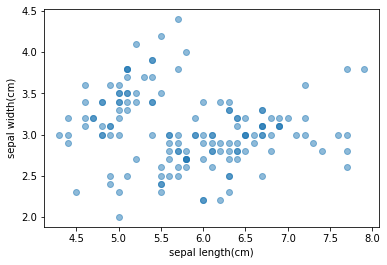

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
print(samples)

#두가지 feature(특성)만을 사용
from matplotlib import pyplot as plt
x = samples[:, 0]
y = samples[:,1]
plt.scatter(x,y,alpha=0.5) #색상의 투명도 ; 0-완전투명, 1-불투명
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.show()

[(6.855704730863831, 3.8877344982051767), (4.418921492075821, 2.7465080129841137), (5.368926799179885, 3.4767625633995225)]


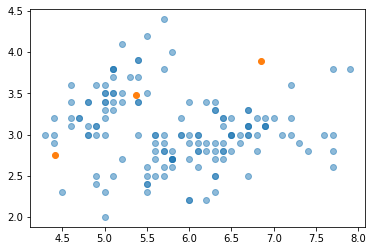

In [13]:
#Place K radom Centroids: 제일 먼저 k개의 centroids(중심값)를 임의로 지정
#3가지 종이 존재하므로 k는 3으로 설정

import numpy as np
k = 3

#랜덤으로x,y좌표 3개를 생성합니다
#nprandom.uniform은 주어진 최소, 최대값 사이에서 k개만큼 실수, 난수를 생성합니다
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))
print(centroids)

#centrodis는 임의로 생성한 (x, y)좌표 3개를 갖게 됨
plt.scatter(x, y, alpha=0.5) #데이터들은 파란색으로 표시
plt.scatter(centroids_x, centroids_y) #centroids는 주황색으로 표시
plt.show()

In [ ]:
def distandce(a, b):
  reurtn sum([(el_a = el_b)**2 for el_a, el_b in list(zop(a,b))]) ** 0.5

  labels - np.zeros(len(samples))
  sepal_length_width = np.array(list(zip(x,y)))

  for i in range(len(samples)):
    distaces = np.zeros(k)
    for j in range(len(k)):
      distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = 